In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


__Replacing blanks with 0 since tenure is 0 and no totalcharges are recorded__

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

___Replaced 0 and 1 value of senior citizens to yes/no to make it understandable___

In [14]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "No"
df["SeniorCitizen"] = df['SeniorCitizen'].apply(conv)
       

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df['SeniorCitizen'].unique()

array(['No', 'yes'], dtype=object)

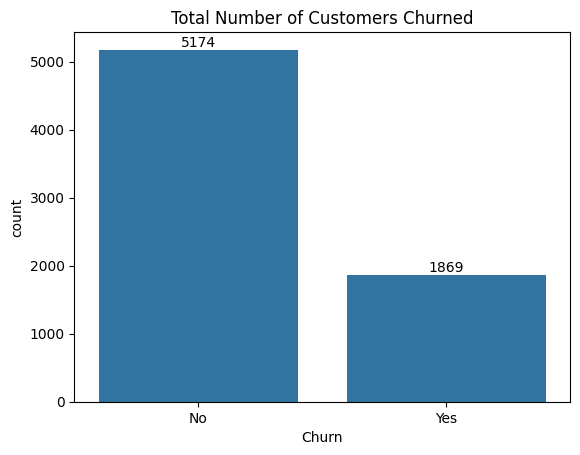

In [17]:
ax = sns.countplot(x="Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Total Number of Customers Churned")
plt.show()

Text(0.5, 1.0, 'Percentage of Churned Customers')

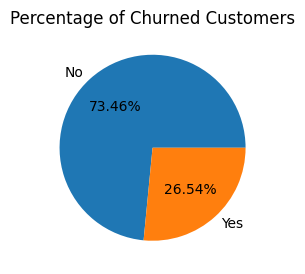

In [18]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.figure(figsize=(3,4))
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")

plt.title("Percentage of Churned Customers")


___From the given pie chart, we can conclude that 26.54% of the total customers have ch___

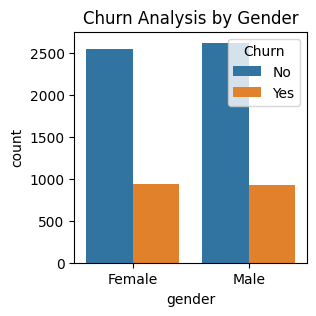

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn Analysis by Gender")
plt.show()

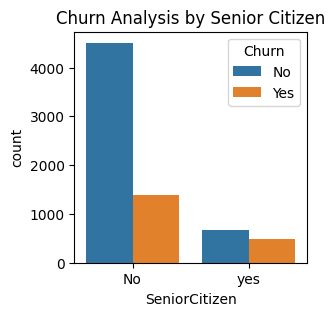

In [20]:
plt.figure(figsize=(3,3))
sns.countplot(x = "SeniorCitizen", data=df, hue="Churn")
plt.title("Churn Analysis by Senior Citizen")
plt.show()

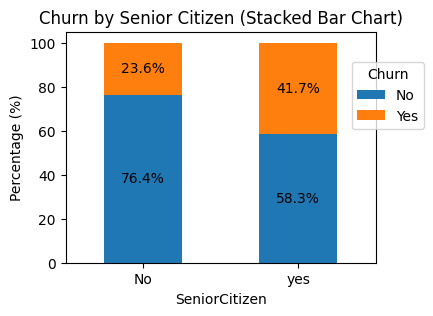

In [21]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4,3))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

___Conclusion : Higher percentage of senior citizens have churned out.___

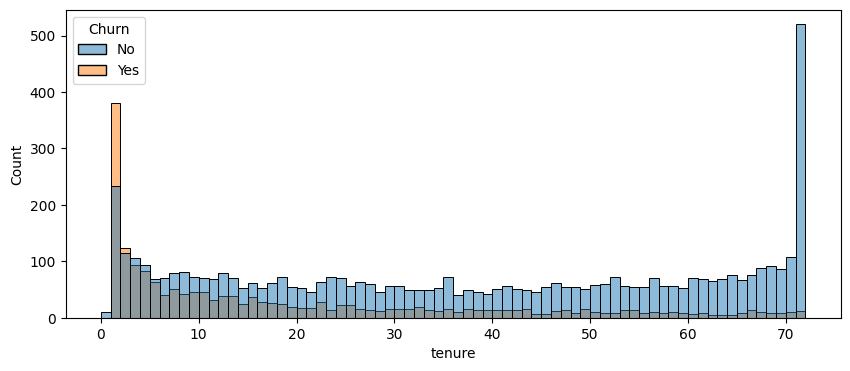

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(x = 'tenure', data=df, bins=72, hue='Churn')
plt.show()

___Conclusion : People who have used the services for shorter period of time(1 or 2 months) have churned out more than the people who have used services for longer period of time.___

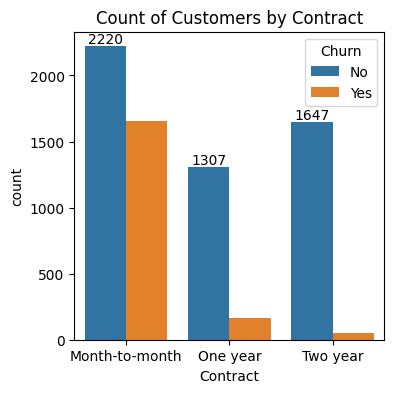

In [23]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

___Conclusion : People who have contract for shorter period(month-month) have churned out more than that for longer period of time.___

In [24]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

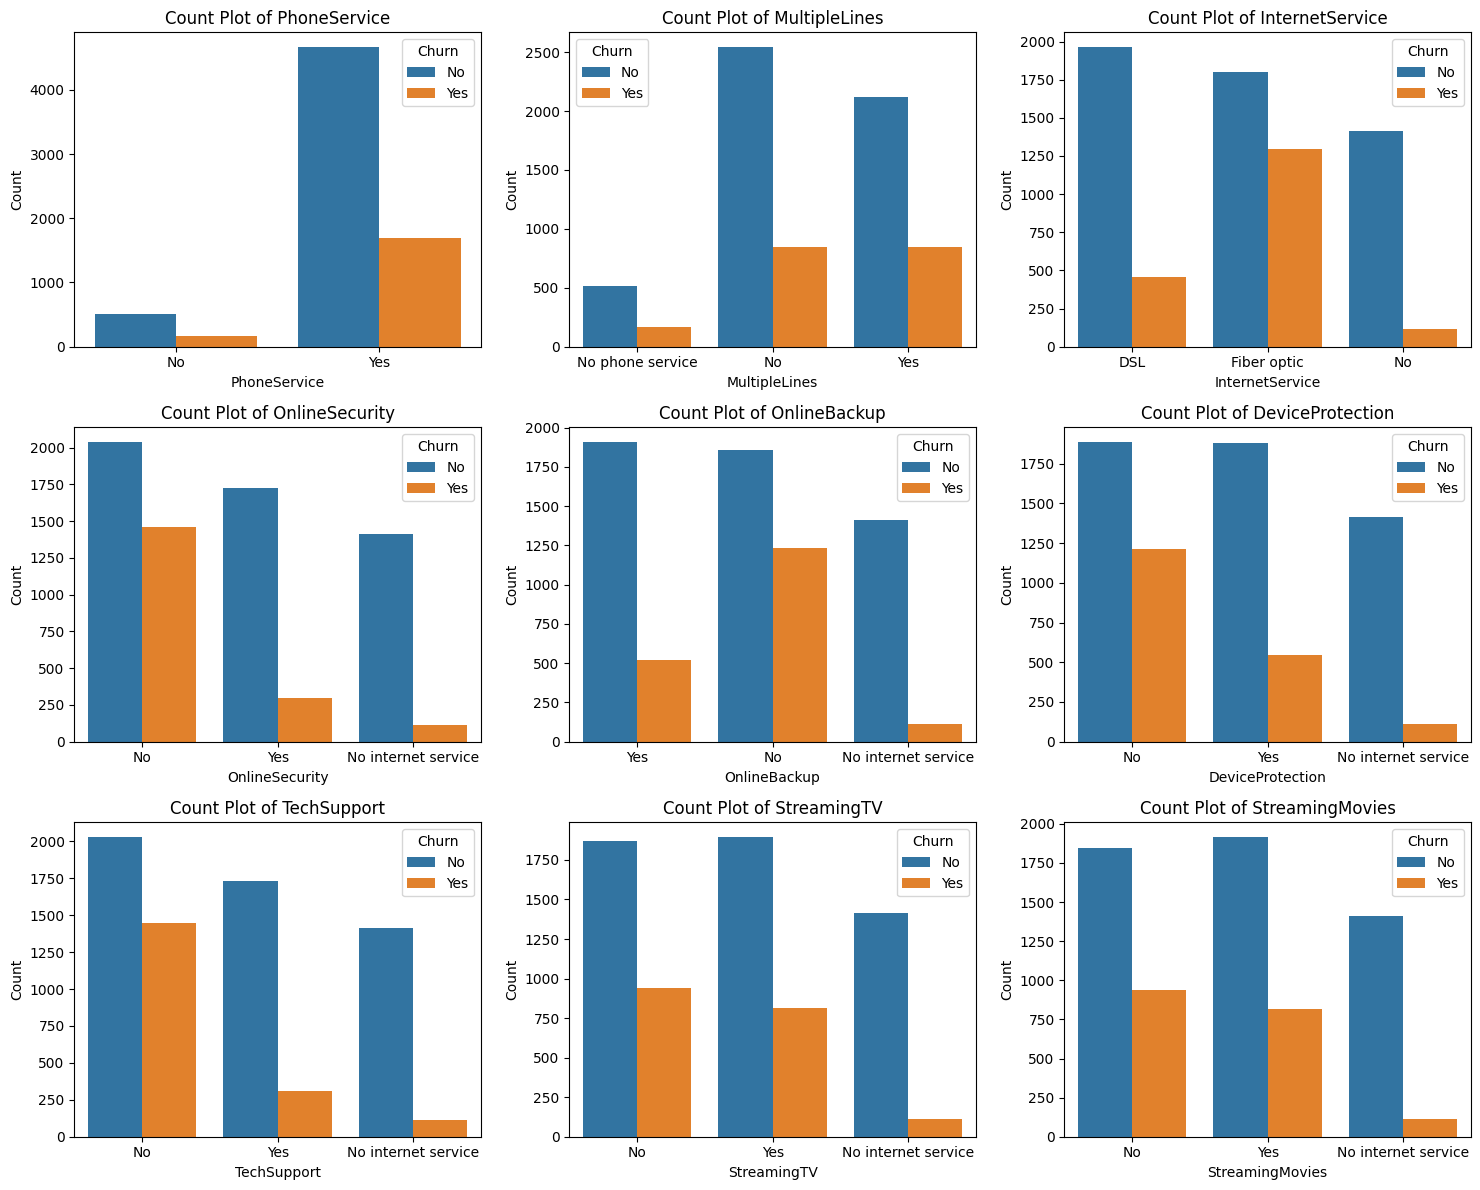

In [25]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


___Conclusion : Services like online backup, tech support and streaming tv have chrn rate relatively higher when these services are not used r unavailable.___

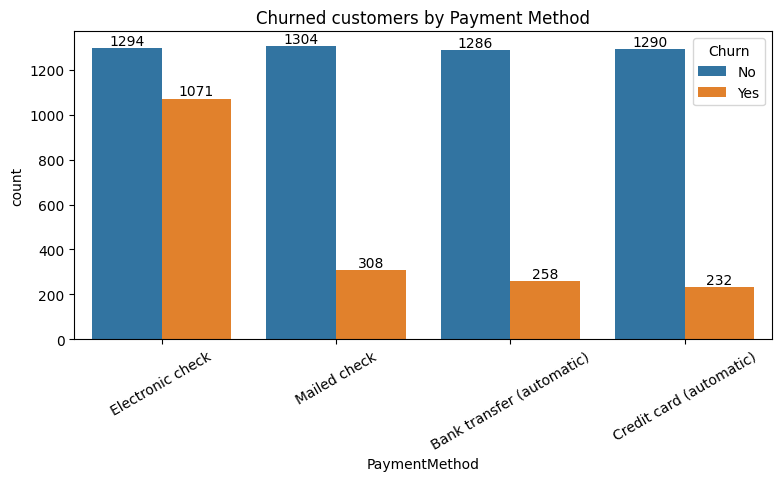

In [33]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=30)
plt.title('Churned customers by Payment Method')
plt.show()

___Conclusion : 'Electronic check' using customers are likely to churn more in compared to other Payment Methods.___

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

In [37]:
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().fillna(0)
tenure_churn['ChurnRate'] = tenure_churn['Yes'] * 100

C:\Users\USER\AppData\Local\Temp\ipykernel_17352\1519216260.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().fillna(0)


C:\Users\USER\AppData\Local\Temp\ipykernel_17352\2637113676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_churn.index, y=tenure_churn['ChurnRate'], palette=sorted_colors)


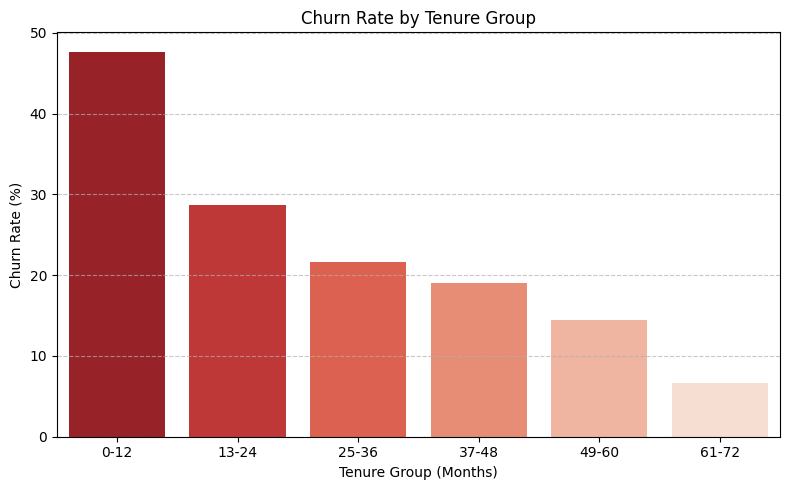

In [41]:
# Map churn rate to color intensity manually
colors = sns.color_palette('Reds', n_colors=len(tenure_churn))
sorted_colors = [colors[i] for i in tenure_churn['ChurnRate'].rank().astype(int) - 1]

plt.figure(figsize=(8,5))
sns.barplot(x=tenure_churn.index, y=tenure_churn['ChurnRate'], palette=sorted_colors)
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group (Months)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


___Conclusion : New users are prone to be churned easily.___

In [45]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
# Define threshold for high-paying customers using median of MonthlyCharges
threshold = df['MonthlyCharges'].median()
df['HighPaying'] = df['MonthlyCharges'] > threshold
churn_rates = df.groupby('HighPaying')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()
churn_rates['ChurnRatePercent'] = churn_rates['Churn'] * 100
churn_rates['ChurnRatePercent'] = churn_rates['ChurnRatePercent'].map(lambda x: f"{x:.2f}%")
print("Churn Rates by Customer Payment Level:")
print(churn_rates[['HighPaying', 'ChurnRatePercent']])
avg_tenure = df.groupby(['HighPaying', 'Churn'])['tenure'].mean().reset_index()
print("\nAverage Tenure by Payment Level and Churn Status:")
print(avg_tenure)

Churn Rates by Customer Payment Level:
   HighPaying ChurnRatePercent
0       False           17.91%
1        True           35.19%

Average Tenure by Payment Level and Churn Status:
   HighPaying Churn     tenure
0       False    No  31.244475
1       False   Yes  10.621835
2        True    No  45.611501
3        True   Yes  21.738076


C:\Users\USER\AppData\Local\Temp\ipykernel_17352\4103050714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='PaymentLevel', data=churn_rates, palette='Set3')


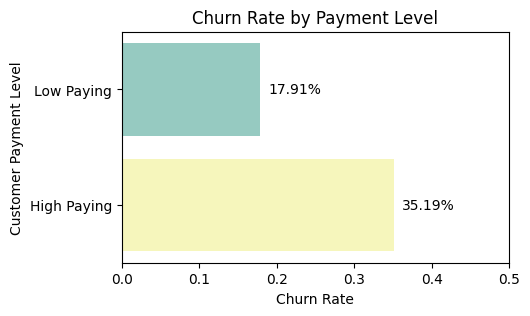

In [53]:

plt.figure(figsize=(5, 3))  # Smaller width and height

sns.barplot(x='Churn', y='PaymentLevel', data=churn_rates, palette='Set3')

plt.xlabel('Churn Rate')
plt.ylabel('Customer Payment Level')
plt.title('Churn Rate by Payment Level')
plt.xlim(0, 0.5)

for i, v in enumerate(churn_rates['Churn']):
    plt.text(v + 0.01, i, f"{v*100:.2f}%", va='center')

plt.show()

___Conclusion : High-paying customers are most likely to churn.___

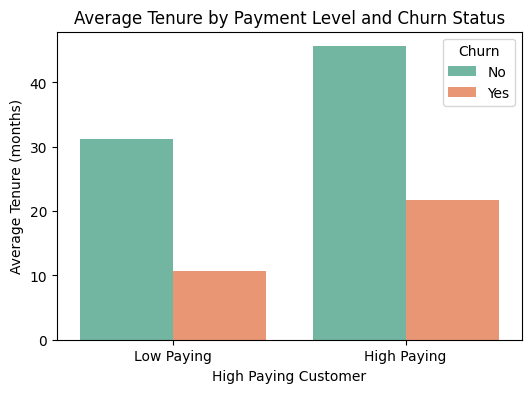

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x='HighPaying', y='tenure', hue='Churn', data=avg_tenure, palette='Set2')
plt.xlabel('High Paying Customer')
plt.ylabel('Average Tenure (months)')
plt.title('Average Tenure by Payment Level and Churn Status')
plt.xticks([0,1], ['Low Paying', 'High Paying'])
plt.legend(title='Churn')
plt.show()

___Conclusion : Those who did not churn have higher average tenure.___

In [60]:
combo_churn = df.groupby('ServiceCombo')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='ChurnRate')
combo_churn['ChurnRatePercent'] = (combo_churn['ChurnRate'] * 100).round(2).astype(str) + '%'
combo_churn_sorted = combo_churn.sort_values('ChurnRate')
print(combo_churn_sorted[['ServiceCombo', 'ChurnRatePercent']].head(10))

                                ServiceCombo ChurnRatePercent
14            DSL_NoPhone_Sec_Tech_TV_Movies            3.85%
12          DSL_NoPhone_Sec_Tech_NoTV_Movies             4.0%
30              DSL_Phone_Sec_Tech_TV_Movies            4.19%
28            DSL_Phone_Sec_Tech_NoTV_Movies             4.3%
45  Fiber optic_Phone_Sec_Tech_NoTV_NoMovies            5.77%
11        DSL_NoPhone_Sec_NoTech_TV_NoMovies            6.25%
27          DSL_Phone_Sec_NoTech_TV_NoMovies            7.14%
31            DSL_Phone_Sec_Tech_TV_NoMovies            7.41%
15          DSL_NoPhone_Sec_Tech_TV_NoMovies            7.69%
26            DSL_Phone_Sec_NoTech_TV_Movies            7.69%


C:\Users\USER\AppData\Local\Temp\ipykernel_17352\1688650468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChurnRate', y='ServiceCombo', data=top_loyal, palette='viridis')


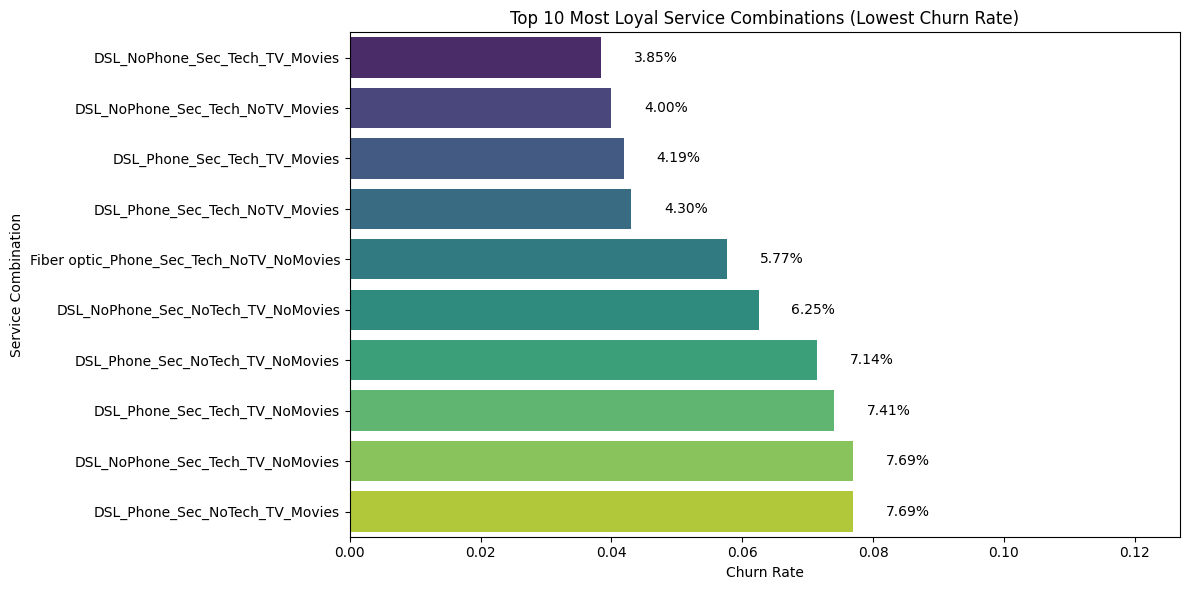

In [61]:
top_loyal = combo_churn_sorted.head(10)
bottom_loyal = combo_churn_sorted.tail(10)
plt.figure(figsize=(12,6))
sns.barplot(x='ChurnRate', y='ServiceCombo', data=top_loyal, palette='viridis')
plt.xlabel('Churn Rate')
plt.ylabel('Service Combination')
plt.title('Top 10 Most Loyal Service Combinations (Lowest Churn Rate)')
plt.xlim(0, top_loyal['ChurnRate'].max() + 0.05)
for i, (rate, combo) in enumerate(zip(top_loyal['ChurnRate'], top_loyal['ServiceCombo'])):
    plt.text(rate + 0.005, i, f"{rate*100:.2f}%", va='center')
plt.tight_layout()
plt.show()

___Conclusion : DSL customers without Phone service but with Online Security and Tech Support are the most loyal, showing churn rates as low as ~3.85% to 4.3%.___

C:\Users\USER\AppData\Local\Temp\ipykernel_17352\34961305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChurnRate', y='ServiceCombo', data=bottom_loyal, palette='rocket')


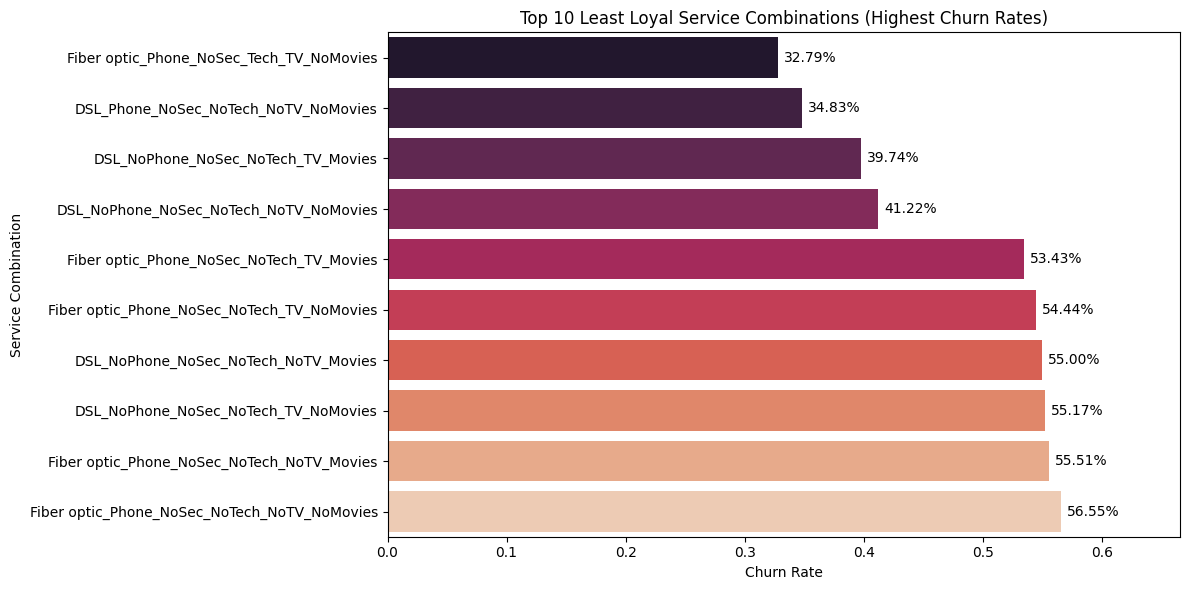

In [62]:
# Get bottom 10 least loyal (highest churn) service combos
bottom_loyal = combo_churn_sorted.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ChurnRate', y='ServiceCombo', data=bottom_loyal, palette='rocket')

plt.xlabel('Churn Rate')
plt.ylabel('Service Combination')
plt.title('Top 10 Least Loyal Service Combinations (Highest Churn Rates)')

# Format churn rate as %
for i, (rate, combo) in enumerate(zip(bottom_loyal['ChurnRate'], bottom_loyal['ServiceCombo'])):
    plt.text(rate + 0.005, i, f"{rate*100:.2f}%", va='center')

plt.xlim(0, bottom_loyal['ChurnRate'].max() + 0.1)
plt.tight_layout()
plt.show()


___Conclusion : Fiber Optic customers without Online Security and Tech Support, especially those not using streaming services, have the highest churn rates, reaching up to 56.55%.___

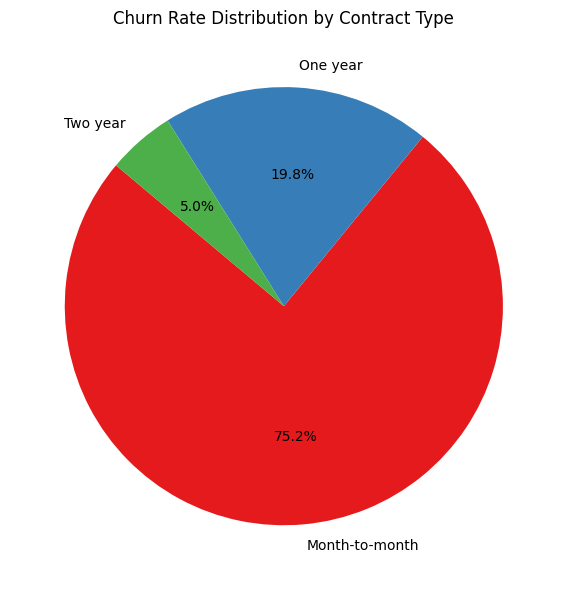

In [66]:
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='ChurnRate')
contract_churn['ChurnRatePercent'] = (contract_churn['ChurnRate'] * 100).round(2).astype(str) + '%'

plt.figure(figsize=(6, 6))
plt.pie(contract_churn['ChurnRate'], labels=contract_churn['Contract'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('Churn Rate Distribution by Contract Type')
plt.tight_layout()
plt.show()


___Conclusion : Month-to-month Contract type customers have higher churn rate.___

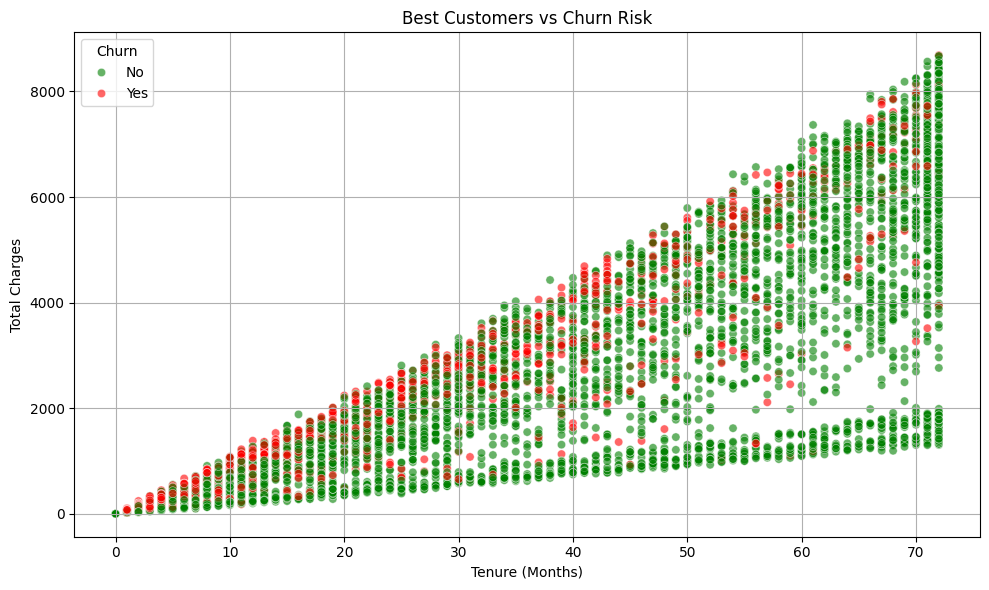

In [67]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette={'No': 'green', 'Yes': 'red'}, alpha=0.6)
plt.title('Best Customers vs Churn Risk')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.grid(True)
plt.tight_layout()
plt.show()

___Conclusion : Customers with low total charges and short tenure are at a higher risk of churn.___

C:\Users\USER\AppData\Local\Temp\ipykernel_17352\642318287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set3')


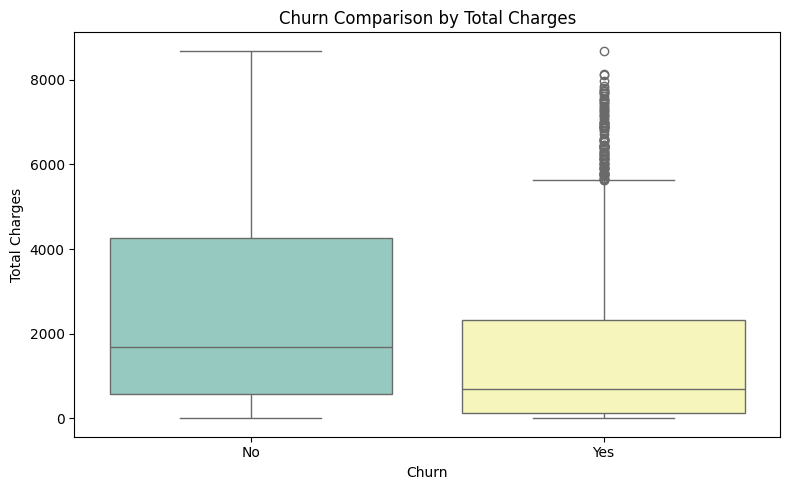

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set3')
plt.title('Churn Comparison by Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()


In [69]:
df.to_csv('Cleaned Customer Churn.csv', index=False)